# Preprocessing steps in Machine Learning

Data preprocessing is the first step in any data analysis or machine learning pipeline. It involves cleaning, transforming and organizing raw data to ensure it is accurate, consistent and ready for modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('default of credit card clients.xls')
df.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [7]:
df.shape


(30001, 25)

In [8]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Fix column names

In [10]:
df.columns = df.columns.str.strip()

In [12]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Drop unnecessary column (ID)

In [15]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

Inspect Data Structure and Check Missing Values-

Dataset size, data types and identify any incomplete (missing) data that needs handling.

df.info(): Prints concise summary including count of non-null entries and data type of each column.

df.isnull().sum(): Returns the number of missing values per column.



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null

In [20]:
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


In [31]:
df.head()

0 LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
0     20000   2         2        1  24     2     2    -1    -1    -2  ...   
1    120000   2         2        2  26    -1     2     0     0     0  ...   
2     90000   2         2        2  34     0     0     0     0     0  ...   
3     50000   2         2        1  37     0     0     0     0     0  ...   
4     50000   1         2        1  57    -1     0    -1     0     0  ...   

0 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
0         0         0         0        0      689        0        0        0   
1      3272      3455      3261        0     1000     1000     1000        0   
2     14331     14948     15549     1518     1500     1000     1000     1000   
3     28314     28959     29547     2000     2019     1200     1100     1069   
4     20940     19146     19131     2000    36681    10000     9000      689   

0 PAY_AMT6 default payment next month  
0        0                          1  
1     2000                          1  
2     5000                          0  
3     1000                          0  
4      679                          0  

[5 rows x 24 columns]

Clean Column Names

In [32]:
df.columns = df.columns.str.strip()
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

Convert all columns to numeric


In [33]:
df = df.apply(pd.to_numeric, errors='coerce')

In [50]:
df.dtypes

0
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Feature Distribution Analysis

In [51]:
df.skew()

0
LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default payment next month     1.343504
dtype: float64

 Identify target variable

In [34]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

Check class imbalance

In [35]:
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

### Feature Scaling

Feature scaling means bringing all numerical features to a similar scale so that no feature dominates the others.

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train–Test Split
Train–test split divides the dataset into:

	•	Training data → used to train the model
	•	Testing data → used to evaluate model performance

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Plotting

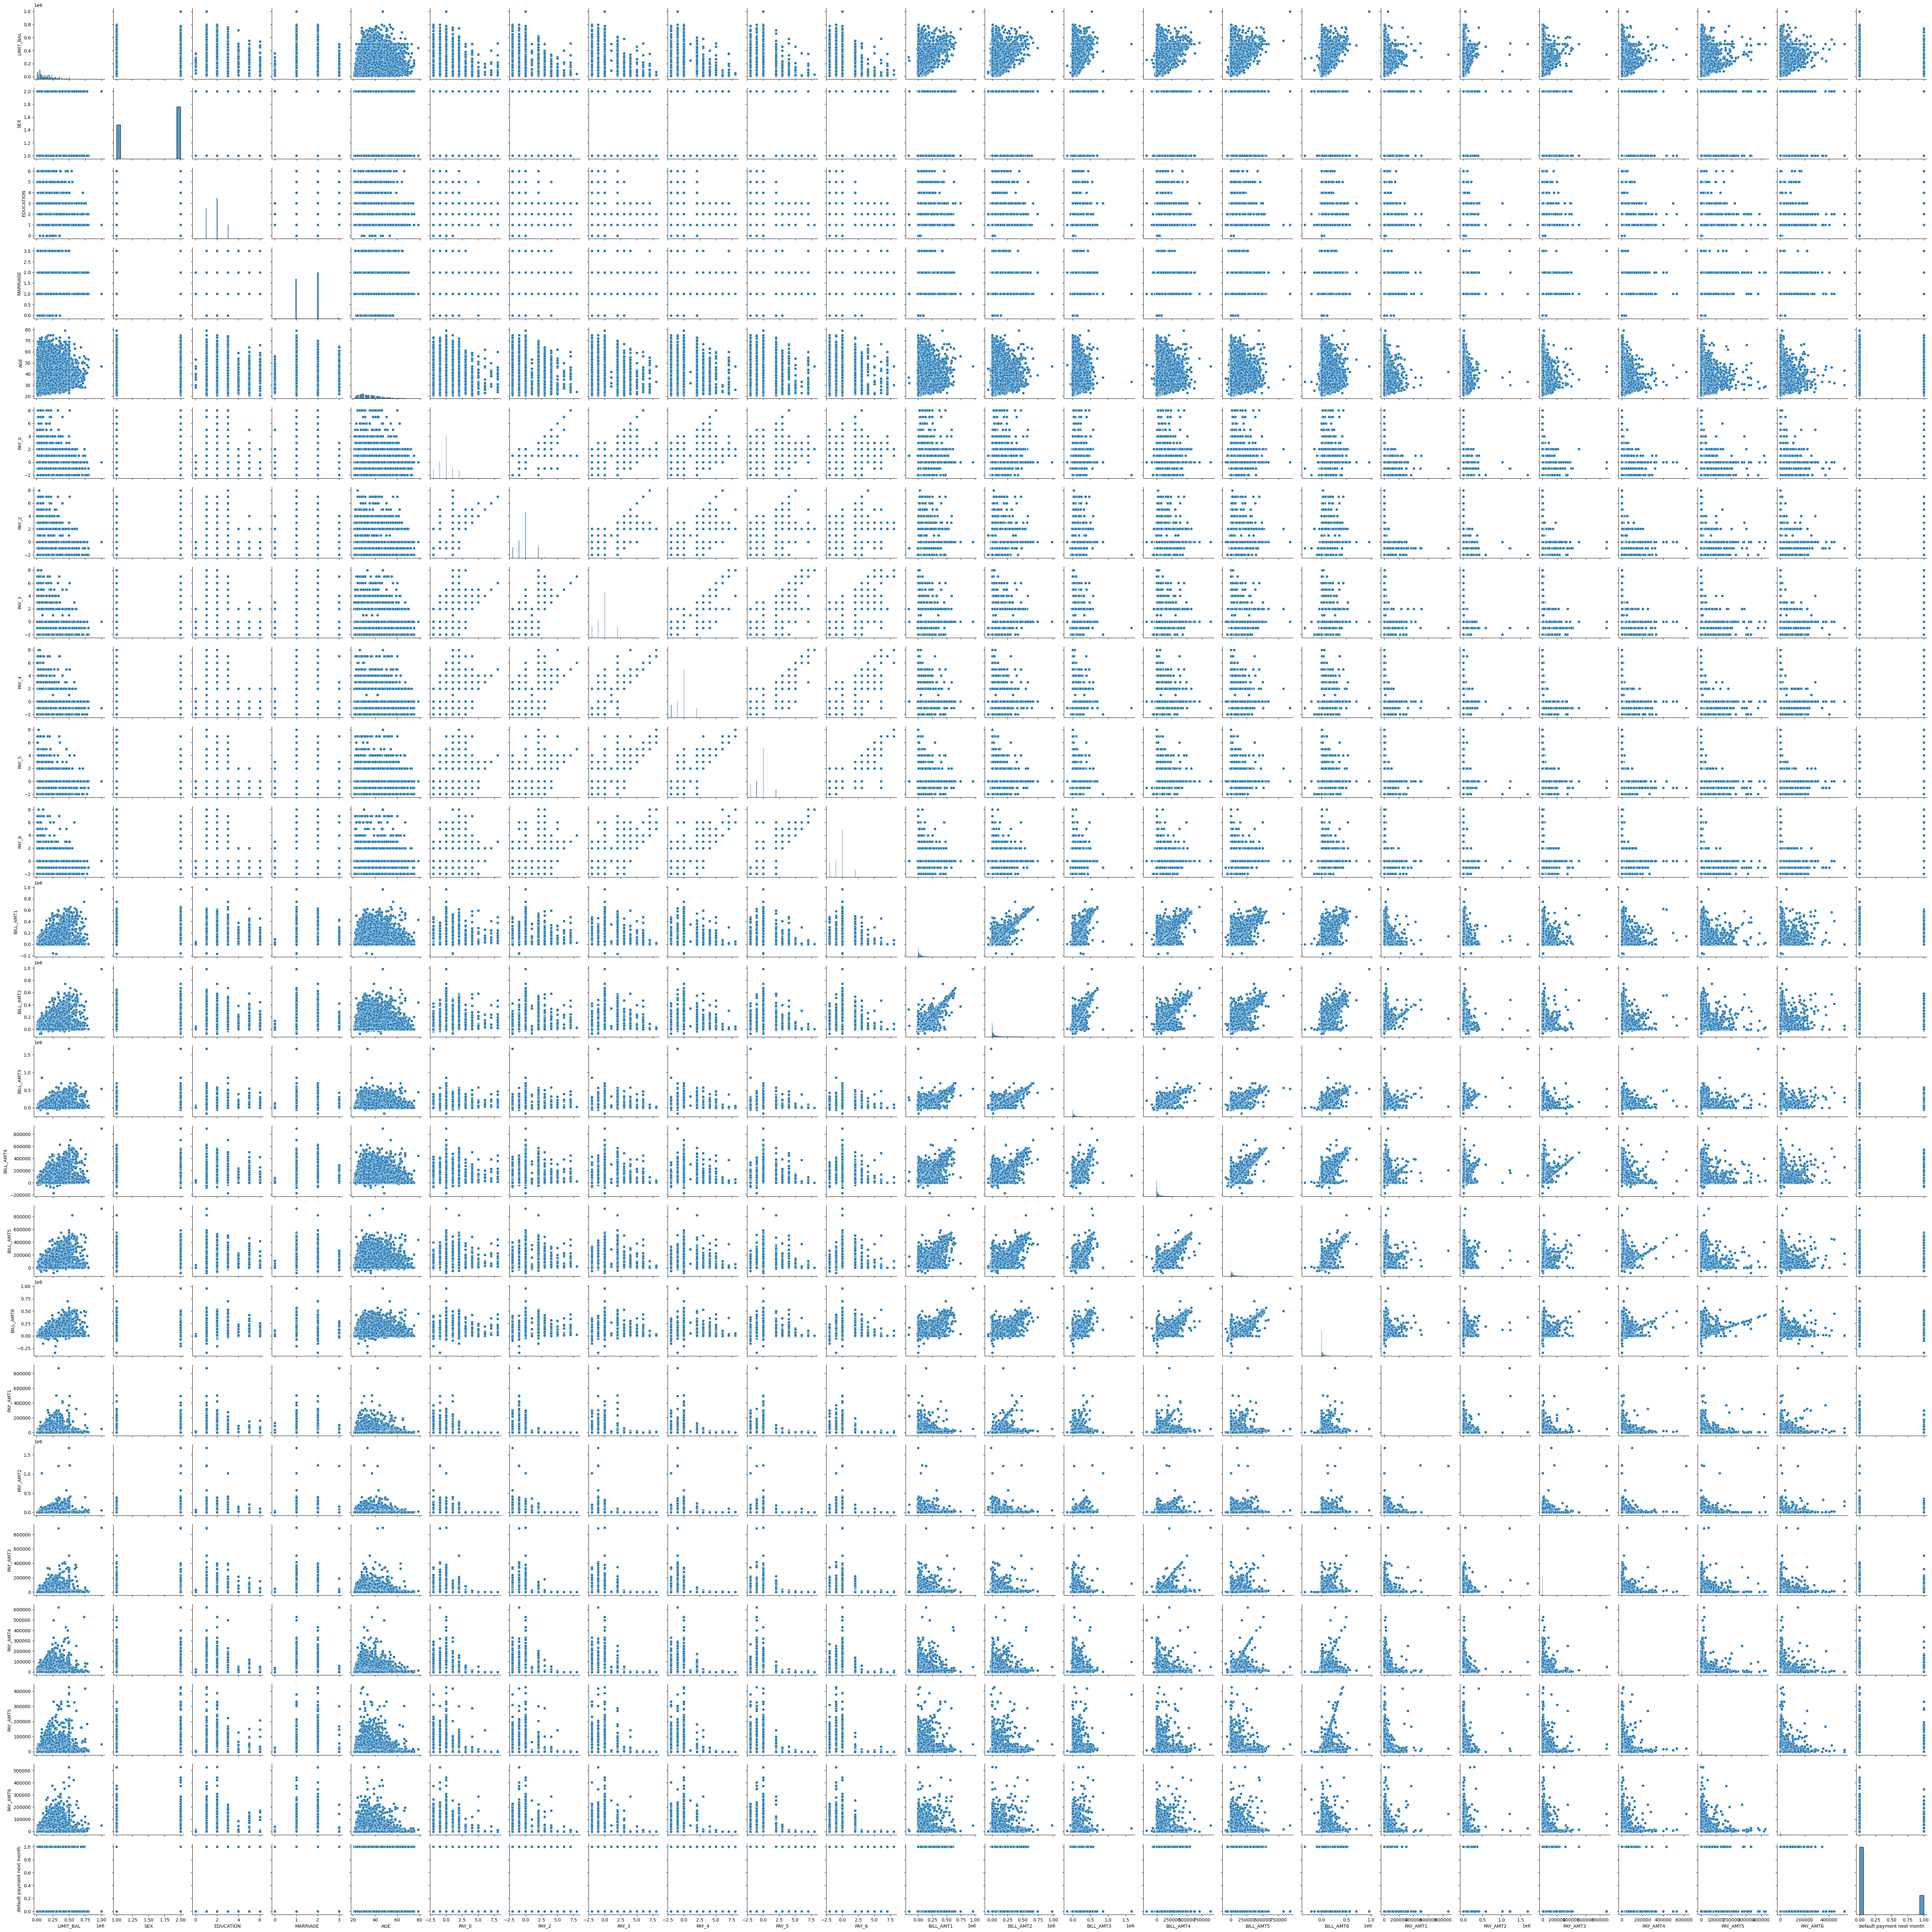

In [40]:
sns.pairplot(df)

Class Distribution

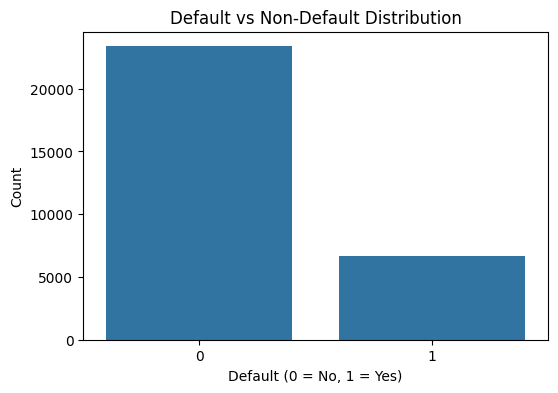

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Default vs Non-Default Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

 Age Distribution vs Default

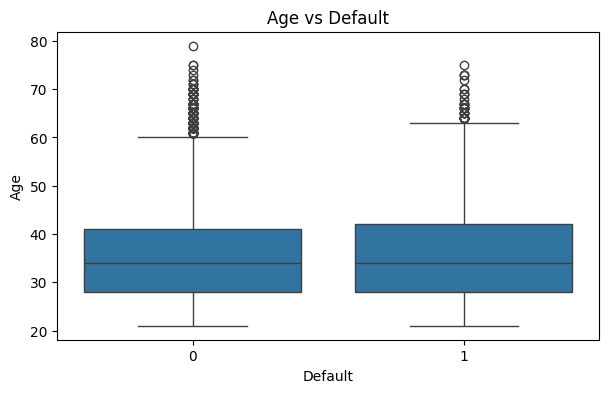

In [43]:
plt.figure(figsize=(7,4))
sns.boxplot(x=y, y=df['AGE'])
plt.title("Age vs Default")
plt.xlabel("Default")
plt.ylabel("Age")
plt.show()

Credit Limit vs Default

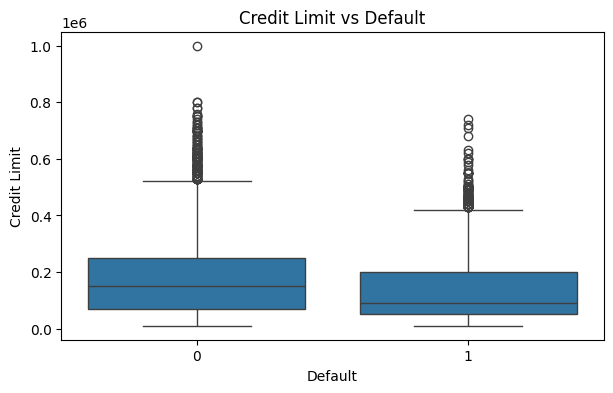

In [44]:
plt.figure(figsize=(7,4))
sns.boxplot(x=y, y=df['LIMIT_BAL'])
plt.title("Credit Limit vs Default")
plt.xlabel("Default")
plt.ylabel("Credit Limit")
plt.show()

 Payment Status vs Default

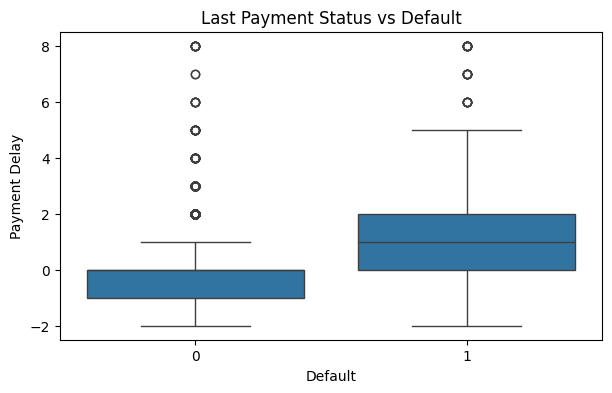

In [45]:
plt.figure(figsize=(7,4))
sns.boxplot(x=y, y=df['PAY_0'])
plt.title("Last Payment Status vs Default")
plt.xlabel("Default")
plt.ylabel("Payment Delay")
plt.show()

Correlation Heatmap

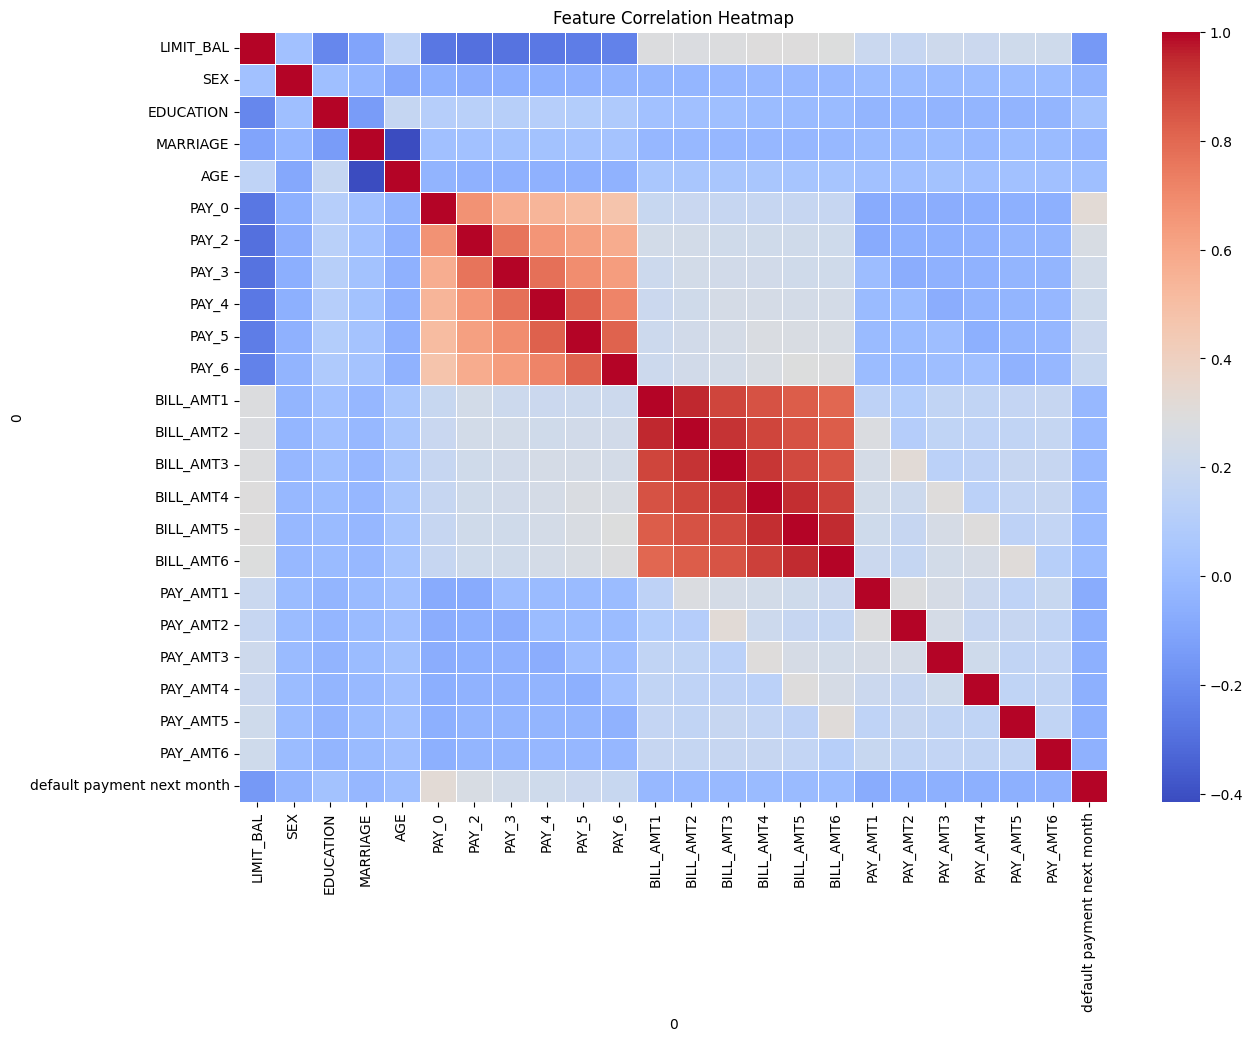

In [46]:
plt.figure(figsize=(14,10))
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: xlabel='0', ylabel='0'>

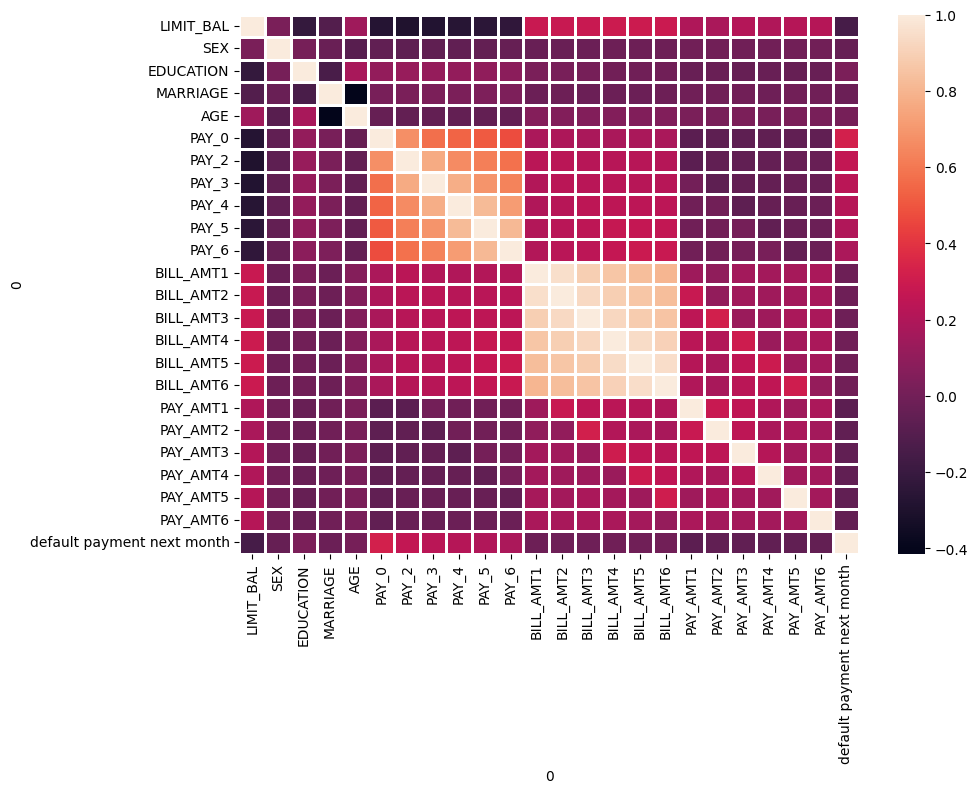

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=False,linewidths=2)

Bill Amount Trend

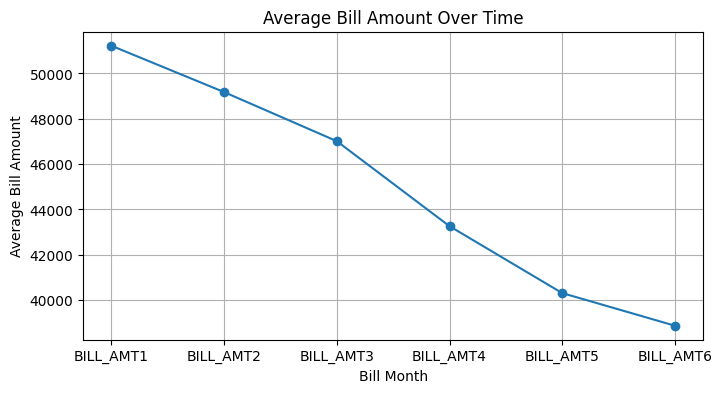

In [47]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

df[bill_cols].mean().plot(kind='line', marker='o', figsize=(8,4))
plt.title("Average Bill Amount Over Time")
plt.xlabel("Bill Month")
plt.ylabel("Average Bill Amount")
plt.grid(True)
plt.show()

Outlier Visualization

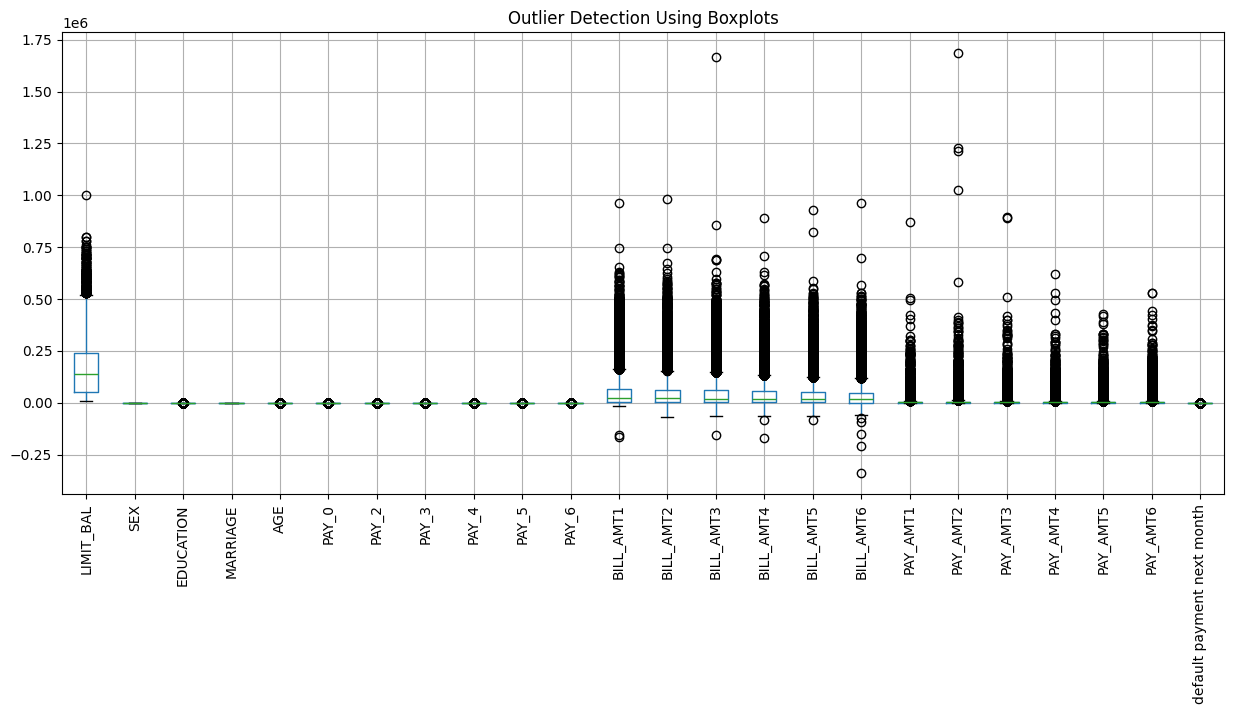

In [49]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(15,6))
numeric_df.boxplot()
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplots")
plt.show()

• Dataset is imbalanced (more non-default cases)

• Credit limit and payment delay are strong indicators of default

• Several numerical features contain outliers

• Bill amounts and payment amounts are highly correlated